In [1]:
import pandas as pd
import numpy as np

# Setitng values in float insted of scientific notation
pd.options.display.float_format = '{:20,.4f}'.format

companies = pd.read_csv('companies.txt',sep='\t',encoding='iso-8859-1')
round2 = pd.read_csv('rounds2.csv',encoding='iso-8859-1')
#Check pont 1-4
#converting company_permalinks to upper and encoding
round2['company_permalink'] = round2['company_permalink'].str.encode('utf-8').str.decode('ascii','ignore')
round2['company_permalink'] = round2['company_permalink'].str.upper()
#converting companies permalink to upper
#companies.columns
companies['permalink'] = companies['permalink'].str.encode('utf-8').str.decode('ascii','ignore')
companies['permalink'] = companies['permalink'].str.upper()
#Rename companies column before merge
companies = companies.rename(columns={'permalink':'company_permalink'})
master_frame = pd.merge(companies, round2, on='company_permalink',how='left')

In [2]:
# getiing data to only include venture type
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture'])]
master_frame.describe()

,raised_amount_usd
count,"50,228.0000"
mean,"11,748,949.1295"
std,"86,352,066.5580"
min,0.0000
25%,"1,600,901.7500"
50%,"5,000,000.0000"
75%,"12,000,000.0000"
max,"17,600,000,000.0000"


In [3]:
# Creating new data frame top9 with the list of countries with highest funding('<data got from wiki')
top9 = master_frame[master_frame['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])]
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA   422,510,842,796.0000
CHN    39,835,418,773.0000
GBR    20,245,627,416.0000
IND    14,391,858,718.0000
CAN     9,583,332,317.0000
FRA     7,259,536,732.0000
ISR     6,907,514,579.0000
DEU     6,346,959,822.0000
JPN     3,363,676,611.0000
Name: raised_amount_usd, dtype: float64

In [4]:
# Creating a new data frame with only these 3 countires data 
top3_english = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
top3_english.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
#a = top3_english.loc[  top3_english['category_list'].isin(['Advice','Algorithms','All Markets','All Students','Alumni','Angels','Collectibles','College Campuses','Distribution','Distributors',
#'DIY','Document Ma0gement','E-Commerce','E-Commerce Platforms','EDA Tools','Ediscovery'])]
#a

country_code
USA   422,510,842,796.0000
GBR    20,245,627,416.0000
IND    14,391,858,718.0000
Name: raised_amount_usd, dtype: float64

In [6]:
############################################### Start 4-5 ###############################################

In [5]:
#loading mapping csv file into a dataframe
mapping = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")
mapping.head(5)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [6]:
## define function to get primary sector
def getPrimary_Section(list_of_data):
    org_data = str(list_of_data)
    if "|"in org_data:
        org_data = org_data.strip('[]')
        formated_data = org_data.split("|")    
        return formated_data[0]
    else:
        return org_data

In [7]:
# Creating new data frame top9 with the list of countries with highest funding('<data got from wiki')
top9 = master_frame[master_frame['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])]
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA   422,510,842,796.0000
CHN    39,835,418,773.0000
GBR    20,245,627,416.0000
IND    14,391,858,718.0000
CAN     9,583,332,317.0000
FRA     7,259,536,732.0000
ISR     6,907,514,579.0000
DEU     6,346,959,822.0000
JPN     3,363,676,611.0000
Name: raised_amount_usd, dtype: float64

In [8]:
# Creating a new data frame with only these 3 countires data 
top3_english = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
top3_english.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA   422,510,842,796.0000
GBR    20,245,627,416.0000
IND    14,391,858,718.0000
Name: raised_amount_usd, dtype: float64

In [9]:
# Rename category_list to primary sector for mapping df
mapping = mapping.rename(columns={'category_list':'primary_sector'})
mapping['primary_sector'] = mapping['primary_sector'].str.lower()

In [10]:
# Rename category_list to primary sector for mapping df 
#top3_english = top3_english.rename(columns={'category_list':'primary_sector'})
#top3_english['primary_sector'] = top3_english['primary_sector'].str.lower()
top3_english['primary_sector'] = top3_english['category_list'].apply(getPrimary_Section)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [11]:
top3_english = pd.merge(top3_english, mapping, how='left', on='primary_sector', indicator=True)

In [14]:
top3_english

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",_merge
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
2,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
3,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
4,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
5,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
6,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
7,/ORGANIZATION/10-MINUTES-WITH,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
8,/ORGANIZATION/1000LOOKZ,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
9,/ORGANIZATION/1000MEMORIES,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only


In [12]:
top3_english['primary_sector']

0                        Media
1        Application Platforms
2                     Software
3                    Analytics
4                    Analytics
5                    Analytics
6                         Apps
7                    Education
8                       Beauty
9                  Curated Web
10                 Curated Web
11                 Curated Web
12                 Curated Web
13                 Curated Web
14                 Curated Web
15                 Health Care
16                   Analytics
17                    Software
18               Biotechnology
19               Biotechnology
20         Enterprise Software
21           Service Providers
22               Manufacturing
23               Manufacturing
24               Manufacturing
25               Manufacturing
26               Manufacturing
27               Manufacturing
28               Manufacturing
29               Manufacturing
                 ...          
41637              Health Care
41638   

In [13]:
left_only = top3_english[top3_english['_merge'] != 'both']
left_only.head()

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",_merge
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
2,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
3,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
4,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only


In [15]:
# replace NaN with 0
#round2
#round2['raised_amount_usd'] = round2['raised_amount_usd'].fillna(0)
# function to replace 0 with na
import re
#mapping['primary_sector'] = mapping.primary_sector.apply(lambda x: re.sub('[0]', 'na', str(x)))

In [16]:
top3_english.primary_sector.sort_values(ascending=True)

35218     3D
22106     3D
523       3D
23023     3D
18497     3D
33119     3D
3385      3D
3384      3D
36955     3D
14783     3D
14784     3D
3383      3D
17190     3D
35217     3D
14101     3D
17191     3D
17192     3D
40768     3D
10634     3D
33286     3D
145       3D
11046     3D
11045     3D
14214     3D
14213     3D
39567     3D
2363      3D
21694     3D
14782     3D
29964     3D
        ... 
27550    nan
34458    nan
28609    nan
28802    nan
25048    nan
23186    nan
6594     nan
14471    nan
9394     nan
8679     nan
16118    nan
16108    nan
20148    nan
12589    nan
31187    nan
14501    nan
34251    nan
40989    nan
6633     nan
27461    nan
27464    nan
9076     nan
32032    nan
28882    nan
28879    nan
16020    nan
38526    nan
27495    nan
3001     nan
6921     nan
Name: primary_sector, Length: 41667, dtype: object

In [17]:
# drop all rows whoes investment is not between 5 and 15 million
top3_english = top3_english.drop(top3_english[(top3_english.raised_amount_usd < 5000000)].index)
top3_english = top3_english.drop(top3_english[(top3_english.raised_amount_usd > 15000000)].index)

d1 = top3_english[top3_english['country_code'] == 'USA']
d2 = top3_english[top3_english['country_code'] == 'GBR']
d3 = top3_english[top3_english['country_code'] == 'IND']

In [18]:
d1

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",_merge
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
2,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
5,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
6,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
13,/ORGANIZATION/1000MUSEUMS-COM,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
21,/ORGANIZATION/128-TECHNOLOGY,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
24,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
25,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
26,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only
27,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,left_only


In [19]:
len(d1)

14383

In [20]:
d1['raised_amount_usd'].count()

12150

In [21]:
d3['raised_amount_usd'].count()

330

In [22]:
d1['raised_amount_usd'].sum()

108531347515.0

In [23]:
d3['raised_amount_usd'].sum()

2976543602.0

In [24]:
d1['raised_amount_usd'].median()

8300000.0

In [25]:
d1['raised_amount_usd'].mean()

8932621.194650205

In [26]:
# USA
d1.pivot_table(values = 'raised_amount_usd',index = ['primary_sector'], aggfunc = {'sum','count'})

,count,sum
primary_sector,,
3D,19,"153,618,298.0000"
3D Printing,5,"36,800,000.0000"
3D Technology,3,"31,000,000.0000"
Accounting,26,"251,148,093.0000"
Active Lifestyle,1,"7,000,000.0000"
Ad Targeting,40,"382,234,187.0000"
Advanced Materials,7,"60,300,000.0000"
Advertising,691,"5,870,184,347.0000"
Advertising Exchanges,4,"26,500,000.0000"


In [27]:
d1.groupby('primary_sector')['raised_amount_usd'].count().sort_values(ascending=False)

primary_sector
Biotechnology               1477
Software                    1044
Advertising                  691
Enterprise Software          642
Analytics                    517
Health Care                  474
Mobile                       429
Clean Technology             379
Curated Web                  312
Hardware + Software          311
Semiconductors               300
E-Commerce                   273
Games                        215
Security                     203
Cloud Computing              201
Health and Wellness          200
Finance                      163
Web Hosting                  159
Manufacturing                143
Apps                         111
Android                       89
nan                           86
Big Data                      84
Education                     80
Automotive                    76
Business Services             71
Messaging                     67
Collaboration                 63
Internet                      60
Computers                   

In [28]:
d2.groupby('primary_sector')['raised_amount_usd'].count().sort_values(ascending=False)

primary_sector
Biotechnology                70
Software                     45
Advertising                  35
Clean Technology             32
Mobile                       29
E-Commerce                   27
Enterprise Software          22
Semiconductors               19
Finance                      17
Curated Web                  16
Games                        15
Manufacturing                14
Health Care                  13
Hardware + Software          13
Automotive                   11
Security                     10
Web Hosting                  10
Travel                        9
Analytics                     8
Customer Service              7
nan                           7
Apps                          6
Fashion                       6
Cloud Computing               5
Financial Services            5
Accounting                    5
Business Services             5
Brand Marketing               5
Application Platforms         5
Cars                          4
                         

In [29]:
d3.groupby('primary_sector')['raised_amount_usd'].count().sort_values(ascending=False)

primary_sector
E-Commerce                      37
Software                        19
Curated Web                     15
Finance                         15
Mobile                          12
Clean Technology                11
Analytics                       10
Fashion                          9
Biotechnology                    9
Real Estate                      9
Education                        9
Health and Wellness              8
Automotive                       7
Advertising                      7
Logistics                        6
Internet                         6
Travel                           6
Health Care                      6
Food Processing                  5
Enterprise Software              5
Apps                             5
Hospitality                      5
Games                            5
Security                         4
EdTech                           4
Consulting                       4
Financial Services               3
Consumer Internet                3
Consu

In [30]:
d1[d1['primary_sector'] == "Biotechnology" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/ORGANIZATION/BIODESIX                  75,300,000.0000
/ORGANIZATION/FORSIGHT-LABS             61,300,001.0000
/ORGANIZATION/RHEONIX                   56,124,758.0000
/ORGANIZATION/ALUNG-TECHNOLOGIES        54,110,403.0000
/ORGANIZATION/METABOLON                 52,420,551.0000
Name: raised_amount_usd, dtype: float64

In [31]:
d2[d2['primary_sector'] == "Biotechnology" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/ORGANIZATION/EUSA-PHARMA                                                          35,600,000.0000
/ORGANIZATION/HORIZON-DISCOVERY                                                    31,353,719.0000
/ORGANIZATION/F-STAR-BIOTECHNOLOGISCHE-FORSCHUNGS-UND-ENTWICKLUNGSGES-M-B-H        29,132,906.0000
/ORGANIZATION/TAKEDA-CAMBRIDGE                                                     22,340,000.0000
/ORGANIZATION/IMMUNE-TARGETING-SYSTEMS                                             20,320,961.0000
Name: raised_amount_usd, dtype: float64

In [32]:
d1[d1['primary_sector'] == "Software" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/ORGANIZATION/BTI-SYSTEMS         48,000,000.0000
/ORGANIZATION/CONVIO              42,750,000.0000
/ORGANIZATION/SCIENCELOGIC        41,000,000.0000
/ORGANIZATION/VYATTA              40,800,000.0000
/ORGANIZATION/MANTARA             40,399,999.0000
Name: raised_amount_usd, dtype: float64

In [33]:
d2[d2['primary_sector'] == "Software" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/ORGANIZATION/ELECTRIC-CLOUD                     37,000,000.0000
/ORGANIZATION/TRIBOLD                            26,000,000.0000
/ORGANIZATION/IP-ACCESS                          25,000,000.0000
/ORGANIZATION/EGLUE-BUSINESS-TECHNOLOGIES        22,000,000.0000
/ORGANIZATION/NJINI                              18,000,000.0000
Name: raised_amount_usd, dtype: float64

In [167]:
d3[d3['primary_sector'] == "E-Commerce" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/ORGANIZATION/FIRSTCRY-COM         39,000,000.0000
/ORGANIZATION/MYNTRA               38,000,000.0000
/ORGANIZATION/PEPPERFRY-COM        28,000,000.0000
/ORGANIZATION/CARATLANE            21,000,000.0000
/ORGANIZATION/LIMEROAD             20,000,000.0000
Name: raised_amount_usd, dtype: float64

In [34]:
d3[d3['primary_sector'] == "Software"].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/ORGANIZATION/NXTGEN-DATA-CENTER-CLOUD-SERVICES        22,300,000.0000
/ORGANIZATION/EXIMSOFT-TRIANZ                          14,000,000.0000
/ORGANIZATION/QUICK-HEAL-TECHNOLOGIES                  13,000,000.0000
/ORGANIZATION/ELITECORE-TECHNOLOGIES                   10,300,000.0000
/ORGANIZATION/APPLABS                                  10,000,000.0000
Name: raised_amount_usd, dtype: float64

In [35]:
d1[d1['primary_sector'] == "Advertising" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/ORGANIZATION/CHOICESTREAM            58,300,000.0000
/ORGANIZATION/ZOOVE                   54,800,000.0000
/ORGANIZATION/CHACHA                  53,000,000.0000
/ORGANIZATION/VISIBLE-MEASURES        48,500,000.0000
/ORGANIZATION/VUCLIP                  48,100,000.0000
Name: raised_amount_usd, dtype: float64

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

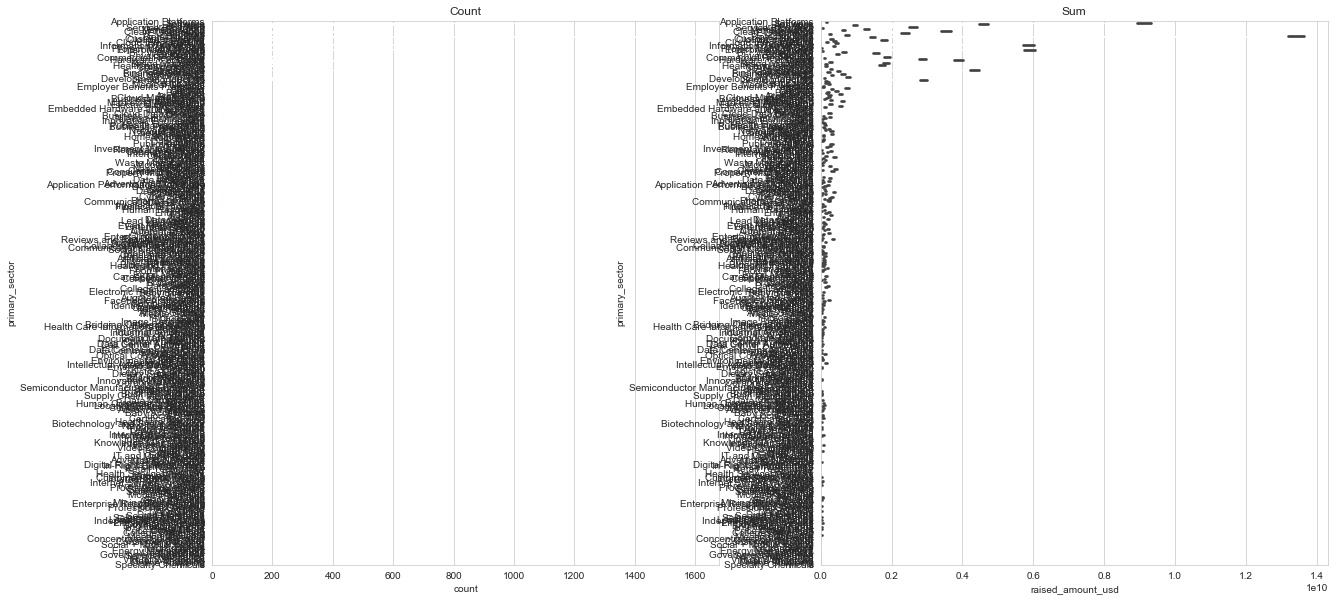

In [41]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="primary_sector", data=d1)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="primary_sector", x="raised_amount_usd", data=d1, estimator=sum)
plt.title("Sum")
plt.show()

In [42]:
d2['raised_amount_usd'].count()

628

In [43]:
d2['raised_amount_usd'].sum()

5436843539.0

In [44]:
d2['raised_amount_usd'].mean()

8657394.170382166

In [45]:
d2['raised_amount_usd'].median()

8000000.0

In [46]:
# GBR
d2.pivot_table(values = 'raised_amount_usd',index = ['primary_sector'], aggfunc = {'sum','count'})

,count,sum
primary_sector,,
3D,1,"14,529,275.0000"
3D Printing,1,"10,000,000.0000"
Accounting,5,"39,400,000.0000"
Advertising,35,"306,794,581.0000"
Advertising Platforms,1,"5,697,713.0000"
Agriculture,0,0.0000
Algorithms,3,"25,564,606.0000"
All Students,0,0.0000
Alumni,1,"12,500,000.0000"


In [54]:
##########################################################End #############################################################

In [ ]:
########################################################## Start #############################################################

In [ ]:
# A plot showing the top 9 countries against the total amount of investments of funding type FT. 
# This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear

In [55]:
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA   422,510,842,796.0000
CHN    39,835,418,773.0000
GBR    20,245,627,416.0000
IND    14,391,858,718.0000
CAN     9,583,332,317.0000
FRA     7,259,536,732.0000
ISR     6,907,514,579.0000
DEU     6,346,959,822.0000
JPN     3,363,676,611.0000
Name: raised_amount_usd, dtype: float64

In [57]:
top3_english.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA   108,531,347,515.0000
GBR     5,436,843,539.0000
IND     2,976,543,602.0000
Name: raised_amount_usd, dtype: float64

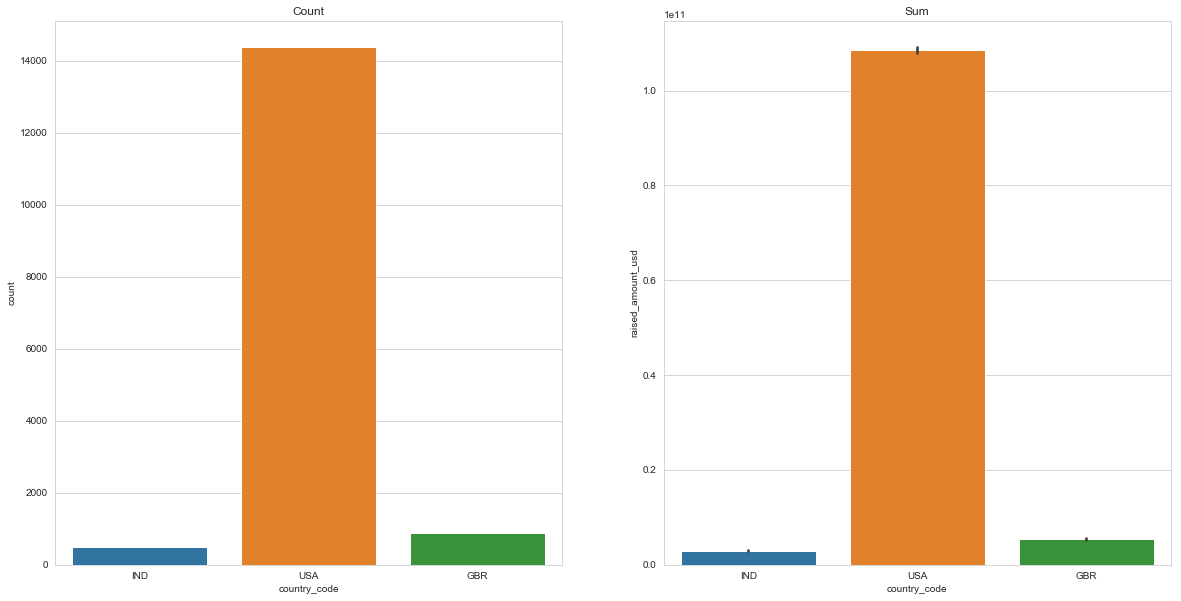

In [58]:
# Plotting sum across top 3 country_code 
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=top3_english)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=top3_english, estimator=sum)
plt.title("Sum")
plt.show()

In [ ]:
########################################################## End #############################################################

In [47]:
checkpt_6_2 = top3_english[ ['country_code','raised_amount_usd','primary_sector'] ]
checkpt_6_2['raised_amount_usd'] = checkpt_6_2['raised_amount_usd'].fillna(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


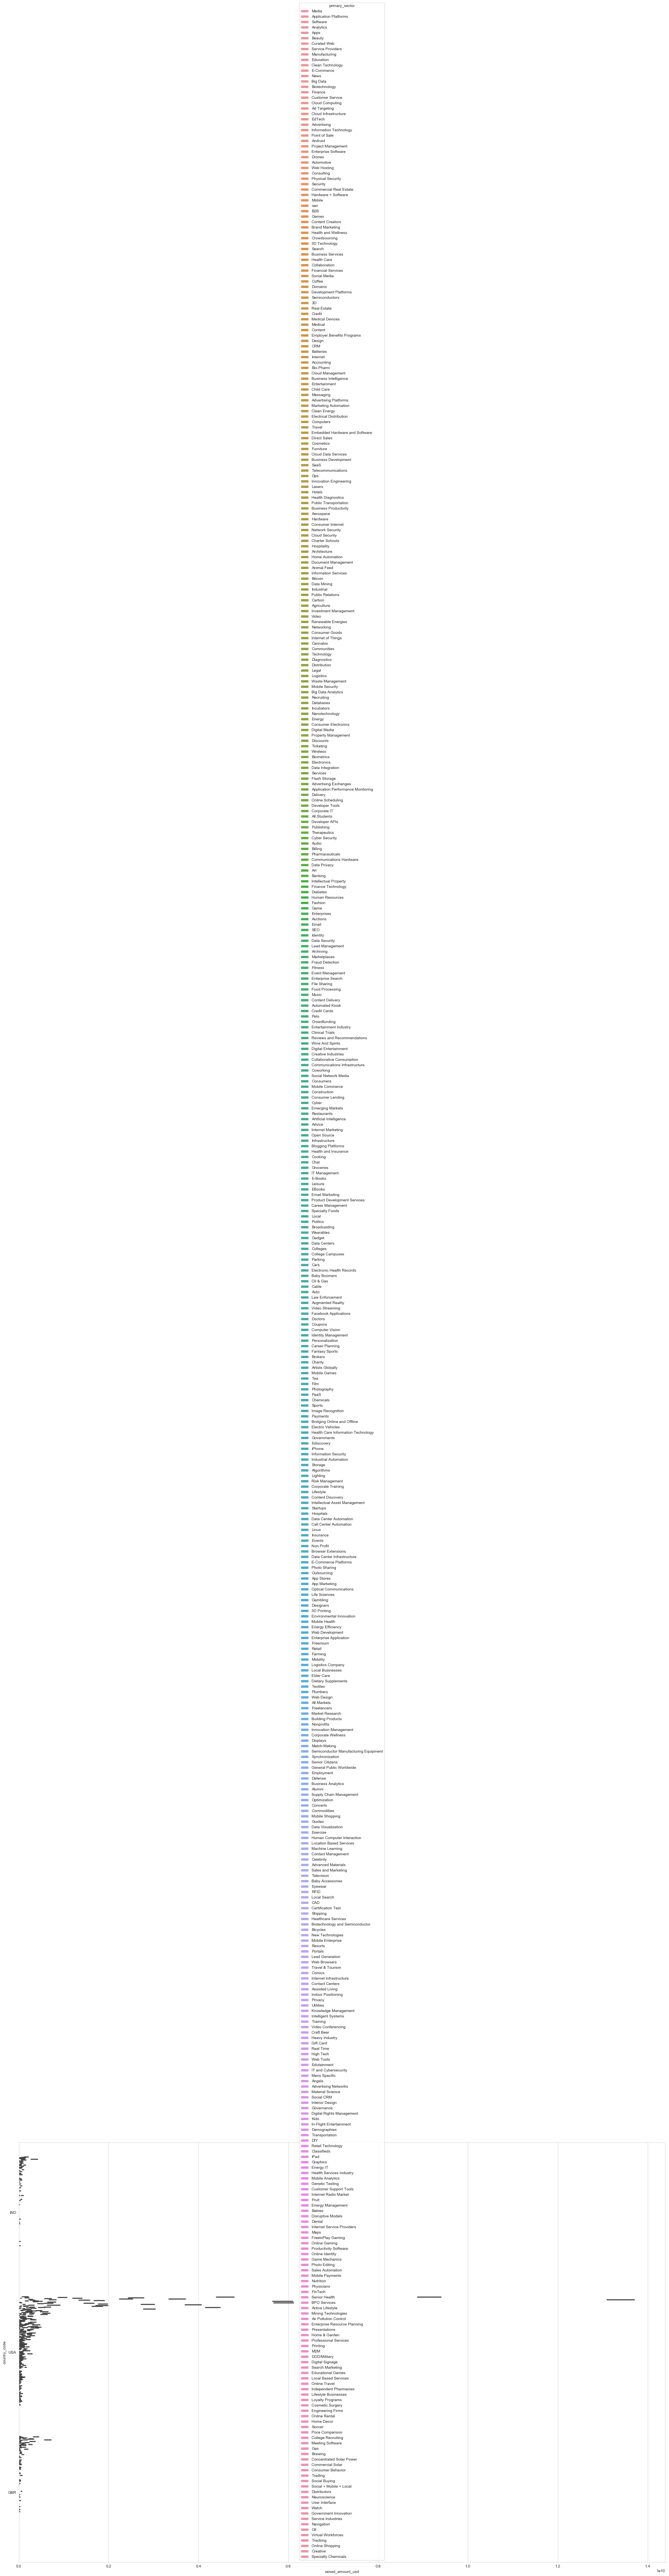

In [48]:
#6-2
# specify hue="categorical_variable"
plt.figure(figsize=(30, 20))
sns.barplot(y='country_code', x='raised_amount_usd', hue="primary_sector", data=checkpt_6_2, estimator=np.sum)
plt.show()

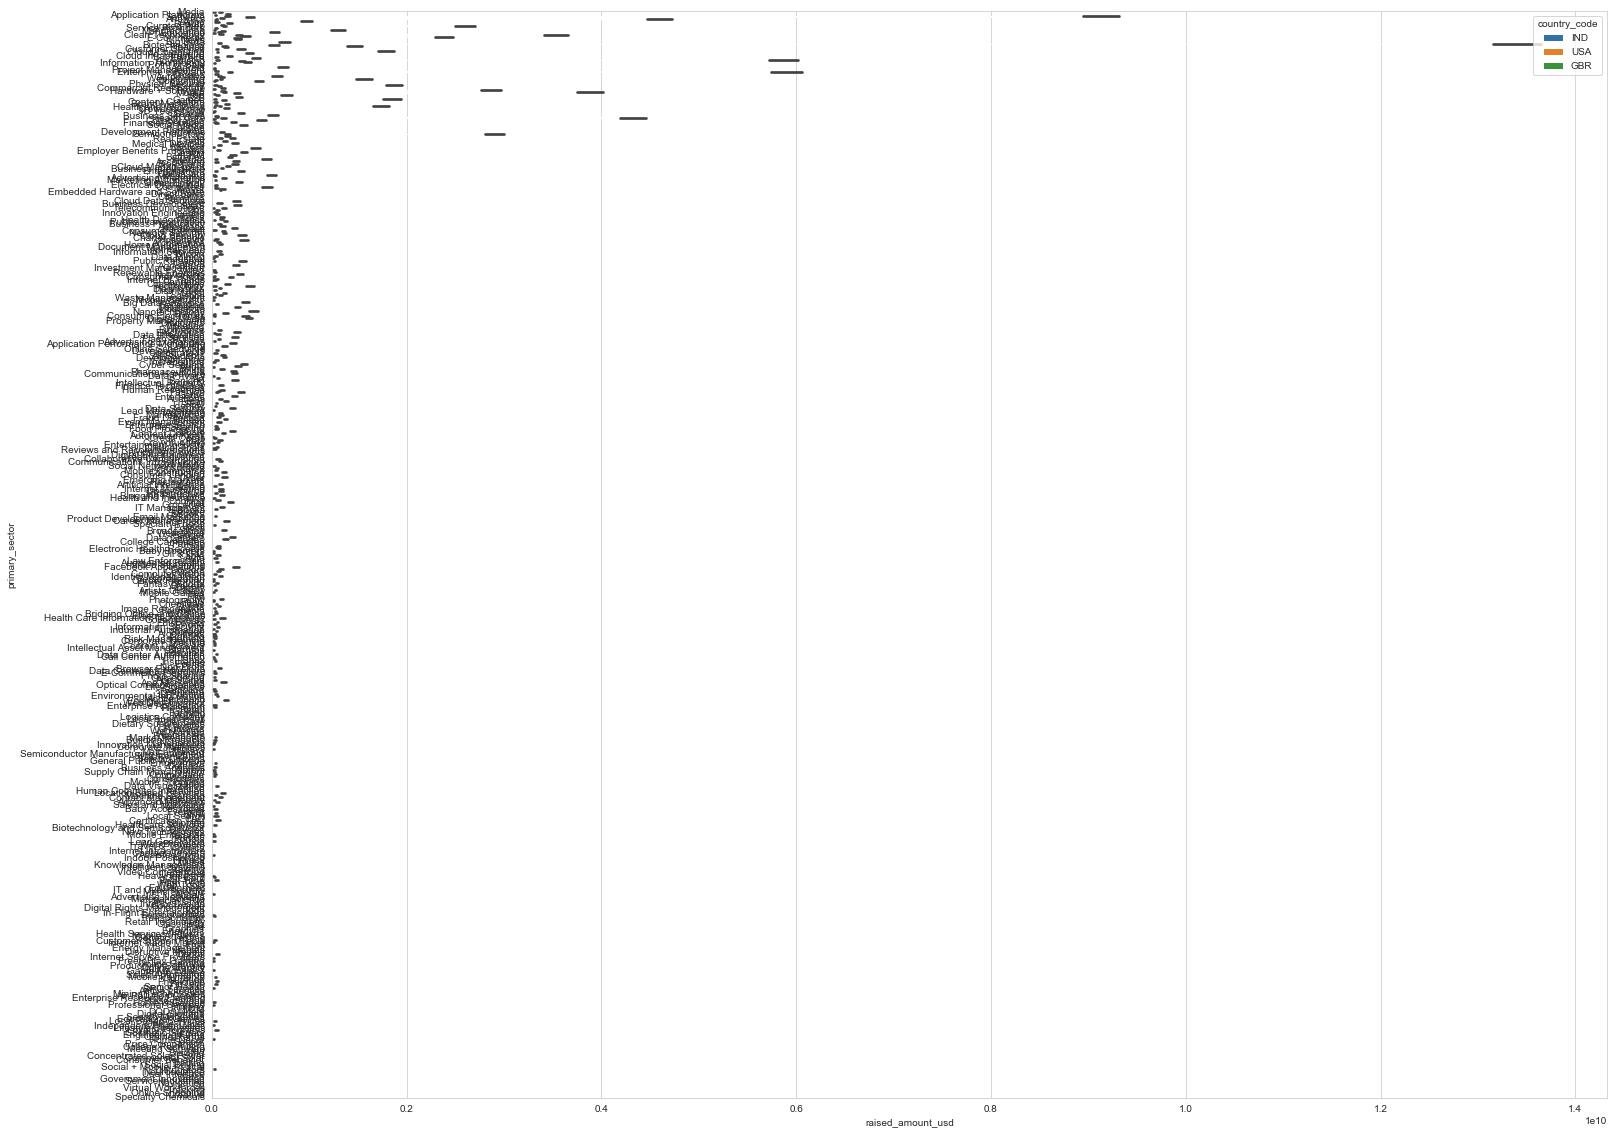

In [215]:
plt.figure(figsize=(25, 20))
sns.barplot(y='primary_sector', x='raised_amount_usd', hue="country_code", data=top3_english, estimator=np.sum)
plt.show()

In [50]:
frame_d1 = checkpt_6_2[checkpt_6_2['primary_sector'].isin(['Biotechnology','Software','Advertising','Enterprise Software','Analytics','Health Care','Mobile'])]
#d1['raised_amount_usd'].count()
#frame_d1 = d1[d1['primary_sector'].isin(['Biotechnology','Software','Advertising'])]
#frame_d1['raised_amount_usd'].count() 

#frame_d2 = d1[d1['primary_sector'].isin(['Software'])]
#frame_d2['raised_amount_usd'].count()

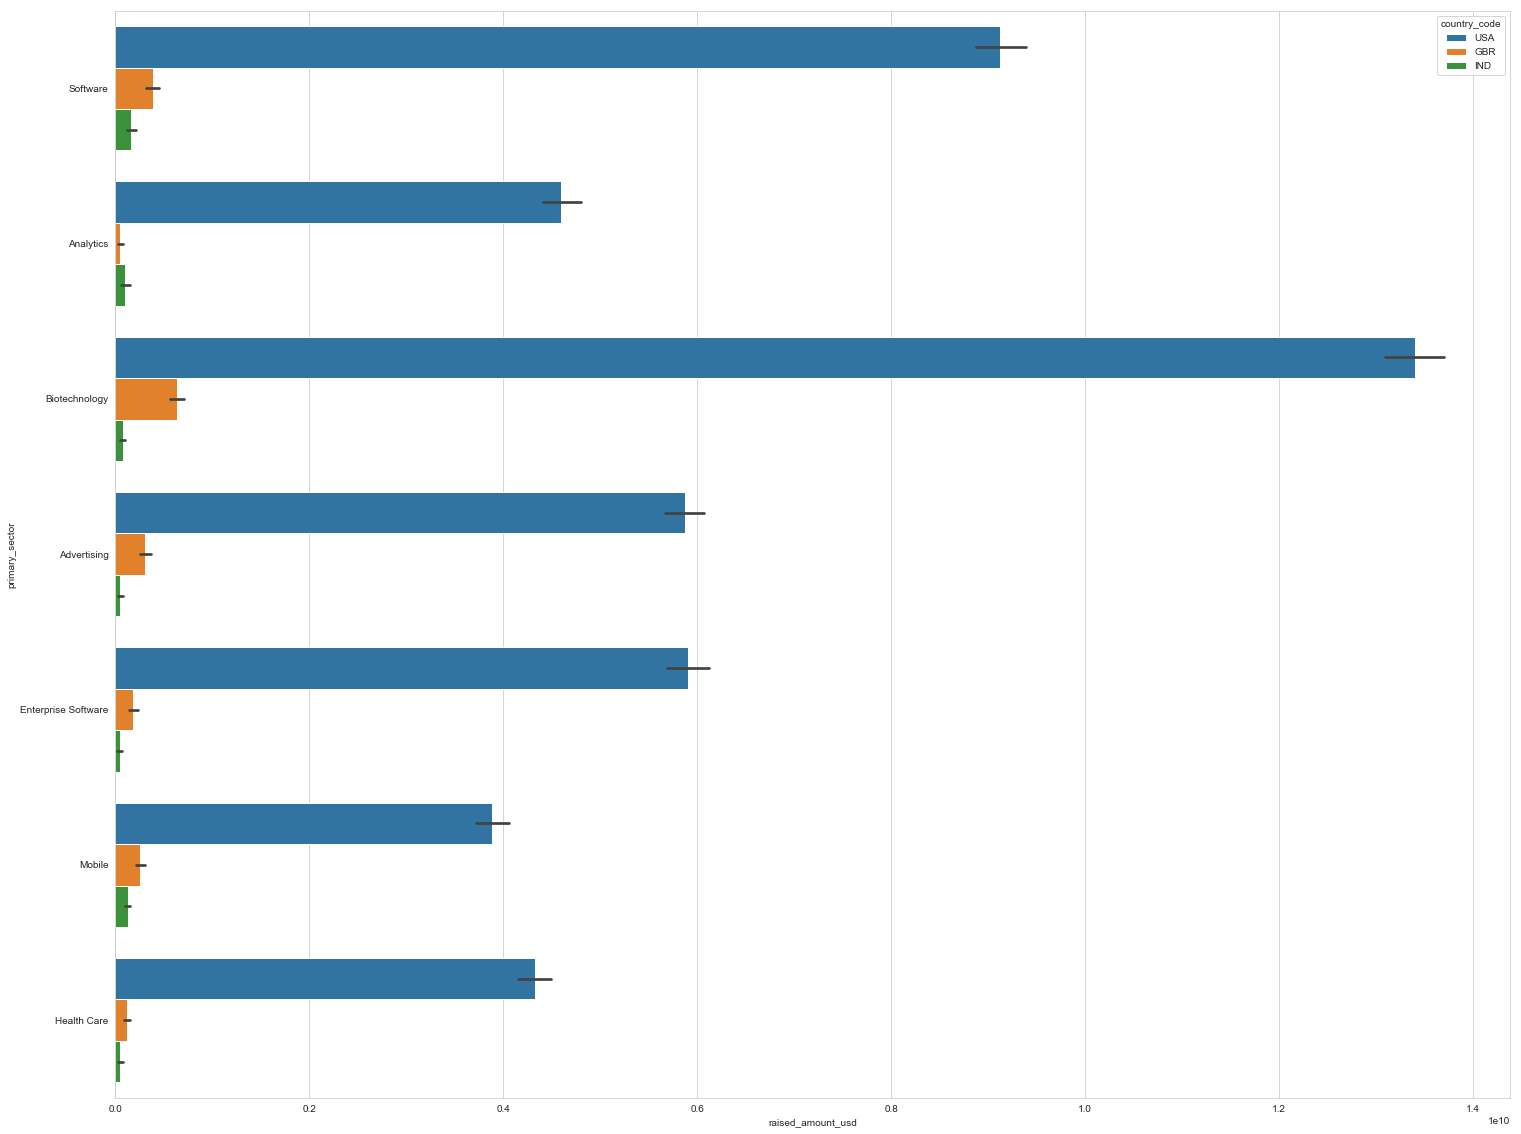

In [51]:
plt.figure(figsize=(25, 20))
sns.barplot(y='primary_sector', x='raised_amount_usd', hue="country_code", data=frame_d1, estimator=np.sum)
plt.show()

In [59]:
########################################### 6.3 Start ##################################### 
# A plot showing the number of investments in the
# top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

In [60]:
frame_d1  = d1[d1['primary_sector'].isin(['Biotechnology','Software','Advertising'])]
frame_d2  = d2[d2['primary_sector'].isin(['Biotechnology','Software','Advertising'])]
frame_d3  = d3[d3['primary_sector'].isin(['E-Commerce','Software','Curated Web'])]

frames = [frame_d1, frame_d2, frame_d3]
result = pd.concat(frames)

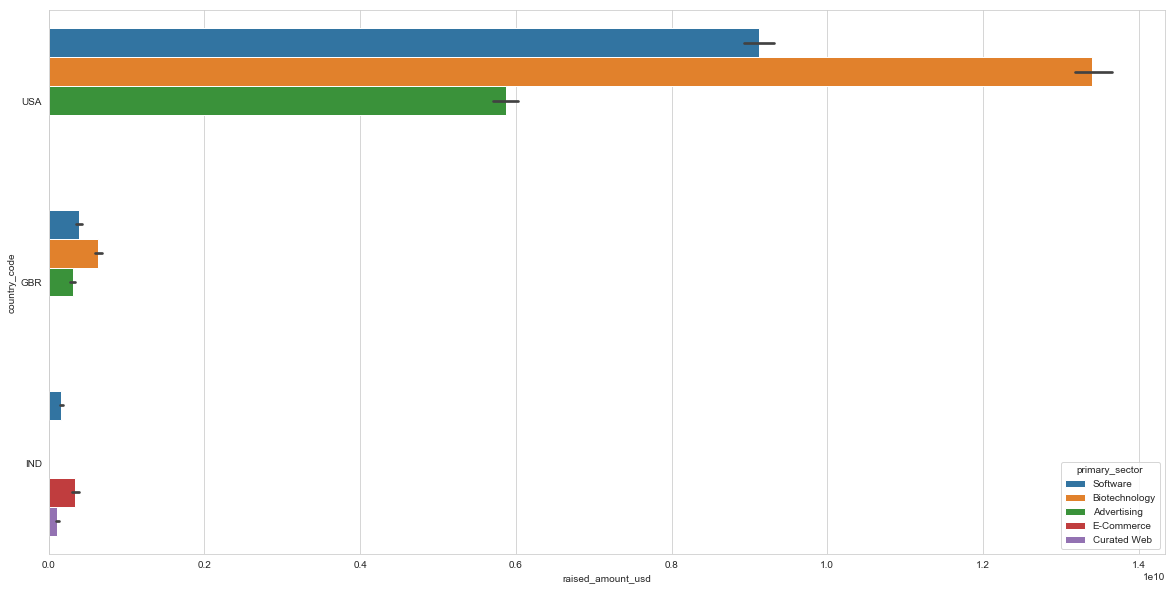

In [61]:
plt.figure(figsize=(20, 10))
sns.barplot(y='country_code', x='raised_amount_usd', hue="primary_sector", data=result, estimator=np.sum)
plt.show()

In [62]:
#################################### 6.3 End ##############################